<a href="https://colab.research.google.com/github/SQLTECHPRO/SQL-Data/blob/main/globox_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Dataset & Libraries

In [ ]:
%cd /content/drive/MyDrive/Master Inferential Stats Project

/content/drive/MyDrive/Master Inferential Stats Project


In [ ]:
import pandas as pd

df = pd.read_csv("glo_box.csv", header=0, index_col=0, skipinitialspace=True)

df.head()

,country,gender,group,join_dt,device,sum
id,,,,,,
1022718,MEX,M,A,1/25/2023,I,NaN
1007436,USA,M,A,2/3/2023,I,NaN
1001069,BRA,M,A,2/1/2023,A,NaN
1021424,GBR,M,A,1/28/2023,A,NaN
1012176,USA,M,B,1/26/2023,I,NaN


In [ ]:
df.shape

(48943, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48943 entries, 1022718 to 1046785
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  48300 non-null  object 
 1   gender   42088 non-null  object 
 2   group    48943 non-null  object 
 3   join_dt  48943 non-null  object 
 4   device   48649 non-null  object 
 5   sum      2094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [ ]:
df['sum'].fillna(0, inplace=True)
df


,country,gender,group,join_dt,device,sum
id,,,,,,
1022718,MEX,M,A,1/25/2023,I,0.0
1007436,USA,M,A,2/3/2023,I,0.0
1001069,BRA,M,A,2/1/2023,A,0.0
1021424,GBR,M,A,1/28/2023,A,0.0
1012176,USA,M,B,1/26/2023,I,0.0
...,...,...,...,...,...,...
1038269,DEU,M,A,2/5/2023,A,0.0
1041446,FRA,M,A,1/28/2023,I,0.0
1032450,TUR,M,B,2/2/2023,I,0.0


In [ ]:
df["converstion_status"] = df["sum"].apply(lambda x: "not converted" if x <= 0 else "converted")
df.tail()

,country,gender,group,join_dt,device,sum,converstion_status
id,,,,,,,
1038269,DEU,M,A,2/5/2023,A,0.0,not converted
1041446,FRA,M,A,1/28/2023,I,0.0,not converted
1032450,TUR,M,B,2/2/2023,I,0.0,not converted
1036224,DEU,F,B,2/6/2023,I,0.0,not converted
1046785,GBR,F,B,1/25/2023,A,0.0,not converted


#Average Amount Spent Per User


In [ ]:
import pandas as pd

# Load the data from your table into a pandas DataFrame
#df = pd.read_csv('your_table.csv')

# Group the data by group and calculate the mean amount spent for each group
grouped_data = df.groupby('group')['sum'].mean()

# Print the average amount spent per group A and group B
print("Average amount spent per group A: ", grouped_data['A'])
print("Average amount spent per group B: ", grouped_data['B'])


Average amount spent per group A:  3.3745184679299185
Average amount spent per group B:  3.3908669458926424


#Average amount spent per user in the control at 95% confidence interval

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Extract the amount spent data for the control group (group A)
control_spending = df.loc[df['group'] == 'A', 'sum']

# Calculate the sample mean and standard deviation
mean = control_spending.mean()
std_dev = control_spending.std(ddof=1)

# Calculate the standard error of the mean
n = len(control_spending)
sem = std_dev / np.sqrt(n)

# Calculate the margin of error for the 95% confidence interval
margin_of_error = stats.t.ppf(0.975, n-1) * sem

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print(f"95% confidence interval for the average amount spent per user in the control group (group A): [{lower_bound:.2f}, {upper_bound:.2f}]")


95% confidence interval for the average amount spent per user in the control group (group A): [3.05, 3.70]


#Average amount spent per user in the treat group at 95% confidence interval

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Extract the amount spent data for the control group (group A)
control_spending = df.loc[df['group'] == 'B', 'sum']

# Calculate the sample mean and standard deviation
mean = control_spending.mean()
std_dev = control_spending.std(ddof=1)

# Calculate the standard error of the mean
n = len(control_spending)
sem = std_dev / np.sqrt(n)

# Calculate the margin of error for the 95% confidence interval
margin_of_error = stats.t.ppf(0.975, n-1) * sem

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print(f"95% confidence interval for the average amount spent per user in the control group (group A): [{lower_bound:.2f}, {upper_bound:.2f}]")


95% confidence interval for the average amount spent per user in the control group (group A): [3.07, 3.71]


### Conduct a hypothesis test to see whether there is a difference in the average amount spent per user between the two groups. What are the resulting p-value and conclusion?

In [ ]:
import pandas as pd
from scipy import stats

# Extract the amount spent data for the two groups
group_a_spending = df.loc[df['group'] == 'A', 'sum']
group_b_spending = df.loc[df['group'] == 'B', 'sum']

# Perform a two-sample t-test assuming unequal variances
t_statistic, p_value = stats.ttest_ind(group_a_spending, group_b_spending, equal_var=False)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Determine the conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


t-statistic: -0.07042491002232605
p-value: 0.943855753153128
We fail to reject the null hypothesis.


#What is the 95% confidence interval for the difference in the average amount spent per user between the treatment and the control (treatment-control)?

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Extract the amount spent data for the two groups
treatment_spending = df.loc[df['group'] == 'B', 'sum']
control_spending = df.loc[df['group'] == 'A', 'sum']

# Calculate the sample means and standard deviations
treatment_mean = treatment_spending.mean()
control_mean = control_spending.mean()
treatment_std_dev = treatment_spending.std(ddof=1)
control_std_dev = control_spending.std(ddof=1)

# Calculate the standard error of the difference between the means
n_treatment = len(treatment_spending)
n_control = len(control_spending)
sem = np.sqrt((treatment_std_dev**2 / n_treatment) + (control_std_dev**2 / n_control))

# Calculate the margin of error for the 95% confidence interval
margin_of_error = stats.t.ppf(0.975, n_treatment+n_control-2) * sem

# Calculate the lower and upper bounds of the confidence interval
diff_mean = treatment_mean - control_mean
lower_bound = diff_mean - margin_of_error
upper_bound = diff_mean + margin_of_error

# Print the results
print(f"95% confidence interval for the difference in the average amount spent per user between the treatment and control groups: [{lower_bound:.2f}, {upper_bound:.2f}]")


95% confidence interval for the difference in the average amount spent per user between the treatment and control groups: [-0.44, 0.47]


#What is the user conversion rate for the control and treatment groups? 

In [ ]:
import pandas as pd

# Count the number of users in each group who made a purchase
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()

# Count the total number of users in each group
control_users = df.loc[df['group'] == 'A'].index.nunique()
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rate for each group
control_conversion_rate = control_conversions / control_users
treatment_conversion_rate = treatment_conversions / treatment_users

# Print the results
print("Conversion rate for the control group (group A): {:.2%}".format(control_conversion_rate))
print("Conversion rate for the treatment group (group B): {:.2%}".format(treatment_conversion_rate))




Conversion rate for the control group (group A): 3.92%
Conversion rate for the treatment group (group B): 4.63%


#What is the 95% confidence interval for the conversion rate of users in the control?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm


# Count the number of users in the control group who made a purchase
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()

# Count the total number of users in the control group
control_users = df.loc[df['group'] == 'A'].index.nunique()

# Calculate the conversion rate for the control group
control_conversion_rate = control_conversions / control_users

# Calculate the standard error of the conversion rate
se = np.sqrt((control_conversion_rate * (1 - control_conversion_rate)) / control_users)

# Calculate the 95% confidence interval using the formula
z_score = norm.ppf(0.975)
lower_ci = control_conversion_rate - z_score * se
upper_ci = control_conversion_rate + z_score * se

# Print the results
print("95% Confidence Interval for Conversion Rate in Control Group: ({:.2%}, {:.2%})".format(lower_ci, upper_ci))


95% Confidence Interval for Conversion Rate in Control Group: (3.68%, 4.17%)


#What is the 95% confidence interval for the conversion rate of users in the treatment?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Count the number of users in the treatment group who made a purchase
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()

# Count the total number of users in the treatment group
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rate for the treatment group
treatment_conversion_rate = treatment_conversions / treatment_users

# Calculate the standard error of the conversion rate
se = np.sqrt((treatment_conversion_rate * (1 - treatment_conversion_rate)) / treatment_users)

# Calculate the 95% confidence interval using the formula
z_score = norm.ppf(0.975)
lower_ci = treatment_conversion_rate - z_score * se
upper_ci = treatment_conversion_rate + z_score * se

# Print the results
print("Conversion Rate in Treatment Group: {:.2%}".format(treatment_conversion_rate))
print("95% Confidence Interval for Conversion Rate in Treatment Group: ({:.2%}, {:.2%})".format(lower_ci, upper_ci))


Conversion Rate in Treatment Group: 4.63%
95% Confidence Interval for Conversion Rate in Treatment Group: (4.37%, 4.89%)


#Conduct a hypothesis test to see whether there is a difference in the conversion rate between the two groups. What are the resulting p-value and conclusion?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm


# Count the number of conversions and users in each group
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()
control_users = df.loc[df['group'] == 'A'].index.nunique()
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rates for each group
control_conversion_rate = control_conversions / control_users
treatment_conversion_rate = treatment_conversions / treatment_users

# Calculate the pooled standard error
pooled_se = np.sqrt(((control_conversion_rate * (1 - control_conversion_rate)) / control_users) + ((treatment_conversion_rate * (1 - treatment_conversion_rate)) / treatment_users))

# Calculate the z-score and p-value
z_score = (treatment_conversion_rate - control_conversion_rate) / pooled_se
p_value = norm.sf(abs(z_score)) * 2

# Print the results
print("Control Conversion Rate: {:.2%}".format(control_conversion_rate))
print("Treatment Conversion Rate: {:.2%}".format(treatment_conversion_rate))
print("Pooled Standard Error: {:.4f}".format(pooled_se))
print("Z-score: {:.4f}".format(z_score))
print("Two-tailed p-value: {:.4f}".format(p_value))

# Test for statistical significance
if p_value < 0.05:
    print("The difference in conversion rate between the two groups is statistically significant (p < 0.05)")
else:
    print("The difference in conversion rate between the two groups is not statistically significant (p >= 0.05)")

# Test for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rate between the two groups is statistically significant (p < {:.2f}), so we reject the null hypothesis".format(alpha))
else:
    print("The difference in conversion rate between the two groups is not statistically significant (p >= {:.2f}), so we fail to reject the null hypothesis".format(alpha))


Control Conversion Rate: 3.92%
Treatment Conversion Rate: 4.63%
Pooled Standard Error: 0.0018
Z-score: 3.8665
Two-tailed p-value: 0.0001
The difference in conversion rate between the two groups is statistically significant (p < 0.05)
The difference in conversion rate between the two groups is statistically significant (p < 0.05), so we reject the null hypothesis


#What is the 95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)? This question is required.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Count the number of conversions and users in each group
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()
control_users = df.loc[df['group'] == 'A'].index.nunique()
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rates for each group
control_conversion_rate = control_conversions / control_users
treatment_conversion_rate = treatment_conversions / treatment_users

# Calculate the standard error of the difference in conversion rates
se = np.sqrt(((treatment_conversion_rate * (1 - treatment_conversion_rate)) / treatment_users) + ((control_conversion_rate * (1 - control_conversion_rate)) / control_users))

# Calculate the 95% confidence interval for the difference in conversion rates
diff = treatment_conversion_rate - control_conversion_rate
lower_ci = diff - 1.96 * se
upper_ci = diff + 1.96 * se

# Print the results
print("Difference in Conversion Rates: {:.2%}".format(diff))
print("95% Confidence Interval for Difference in Conversion Rates: ({:.2%}, {:.2%})".format(lower_ci, upper_ci))


Difference in Conversion Rates: 0.71%
95% Confidence Interval for Difference in Conversion Rates: (0.35%, 1.07%)


#Bar Graph: Conversion Rates and Confidence Intervals


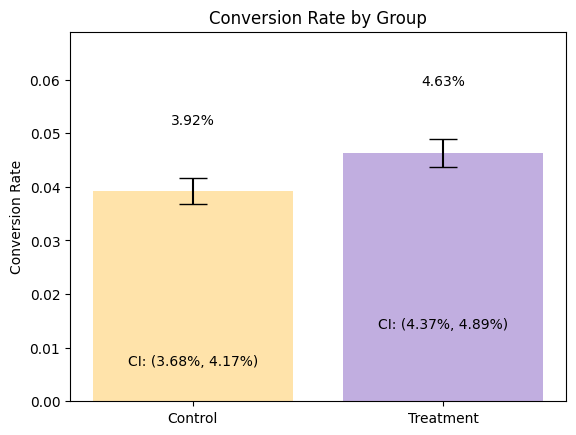

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Count the number of conversions and users in each group
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()
control_users = df.loc[df['group'] == 'A'].index.nunique()
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rates for each group
control_conversion_rate = control_conversions / control_users
treatment_conversion_rate = treatment_conversions / treatment_users

# Calculate the standard error of the conversion rate for each group
control_se = np.sqrt((control_conversion_rate * (1 - control_conversion_rate)) / control_users)
treatment_se = np.sqrt((treatment_conversion_rate * (1 - treatment_conversion_rate)) / treatment_users)

# Calculate the confidence interval for each group
control_ci = 1.96 * control_se
treatment_ci = 1.96 * treatment_se

# Set up the data for the bar chart
labels = ['Control', 'Treatment']
conversion_rates = [control_conversion_rate, treatment_conversion_rate]
cis = [control_ci, treatment_ci]

# Set up colors for the bars
colors = ['#FFC857', '#845EC2']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, conversion_rates, yerr=cis, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)
ax.set_ylim([0, max(conversion_rates) + max(cis) + 0.02])
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate by Group')

# Add the conversion rates and confidence intervals to the chart
for i, v in enumerate(conversion_rates):
    ax.text(i, v + cis[i] + 0.01, "{:.2%}".format(v), ha='center')
    ax.text(i, v - cis[i] - 0.03, "CI: ({:.2%}, {:.2%})".format(v - cis[i], v + cis[i]), ha='center')

# Show the chart
plt.show()



#Distribution Plot

<ipython-input-20-7853237f25cf>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_amount_spent, hist=True, kde=True, rug=True, label='Control', ax=ax)
<ipython-input-20-7853237f25cf>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(treatment_amount_spent, hist=True, kde=True, rug=True, 

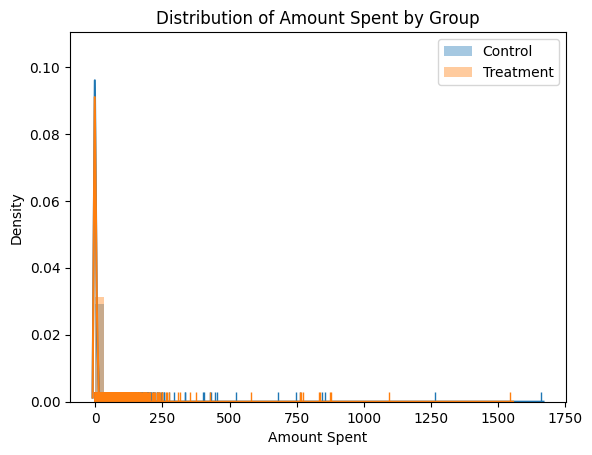

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create separate arrays of the amount spent by users in each group
control_amount_spent = df.loc[df['group'] == 'A', 'sum']
treatment_amount_spent = df.loc[df['group'] == 'B', 'sum']

# Set up the plot
fig, ax = plt.subplots()

# Create the histogram with density curve and rug plot overlaid for the control group
sns.distplot(control_amount_spent, hist=True, kde=True, rug=True, label='Control', ax=ax)

# Create the histogram with density curve and rug plot overlaid for the treatment group
sns.distplot(treatment_amount_spent, hist=True, kde=True, rug=True, label='Treatment', ax=ax)

# Add labels and legend to the plot
ax.set_xlabel('Amount Spent')
ax.set_ylabel('Density')
ax.set_title('Distribution of Amount Spent by Group')
ax.legend()

# Show the plot
plt.show()


#Total Number of Users in Each Group

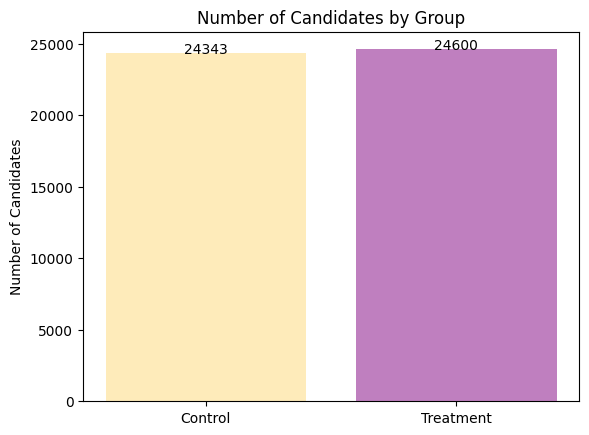

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of candidates in each group
control_candidates = df.loc[df['group'] == 'A'].index.nunique()
treatment_candidates = df.loc[df['group'] == 'B'].index.nunique()

# Set up the data for the bar chart
labels = ['Control', 'Treatment']
candidates = [control_candidates, treatment_candidates]
colors = ['#FED976', '#800080']  

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, candidates, align='center', alpha=0.5, color=colors)
ax.set_ylabel('Number of Candidates')
ax.set_title('Number of Candidates by Group')

# Add the number of candidates to the chart
for i, v in enumerate(candidates):
    ax.text(i, v + 0.01, "{}".format(v), ha='center')

# Show the chart
plt.show()



#Pie Graph Raw Conversions


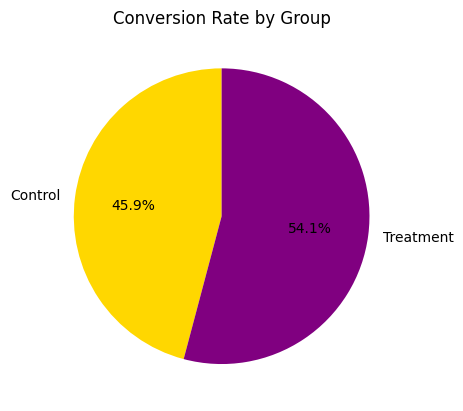

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of conversions and users in each group
control_conversions = df.loc[(df['group'] == 'A') & (df['sum'] > 0)].index.nunique()
treatment_conversions = df.loc[(df['group'] == 'B') & (df['sum'] > 0)].index.nunique()
control_users = df.loc[df['group'] == 'A'].index.nunique()
treatment_users = df.loc[df['group'] == 'B'].index.nunique()

# Calculate the conversion rates for each group
control_conversion_rate = control_conversions / control_users
treatment_conversion_rate = treatment_conversions / treatment_users

# Set up the data for the pie chart
labels = ['Control', 'Treatment']
conversion_rates = [control_conversion_rate, treatment_conversion_rate]

# Define colors for the pie chart
colors = ['#FFD700', '#800080']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(conversion_rates, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Conversion Rate by Group')

# Show the chart
plt.show()



#Conversion Rate by Gender

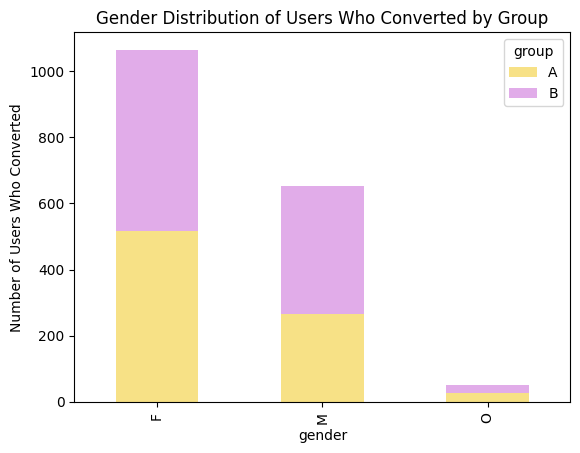

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by gender and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='gender', columns='group', values='id', aggfunc='nunique')

# Create the stacked bar chart with bright purple and yellow colors
ax = pivot_table.plot(kind='bar', stacked=True, alpha=0.5, color=['#f1c40f', '#c45ad4'])
ax.set_ylabel('Number of Users Who Converted')
ax.set_title('Gender Distribution of Users Who Converted by Group')

# Show the chart
plt.show()








# Number of Users By Gender For New Webpage

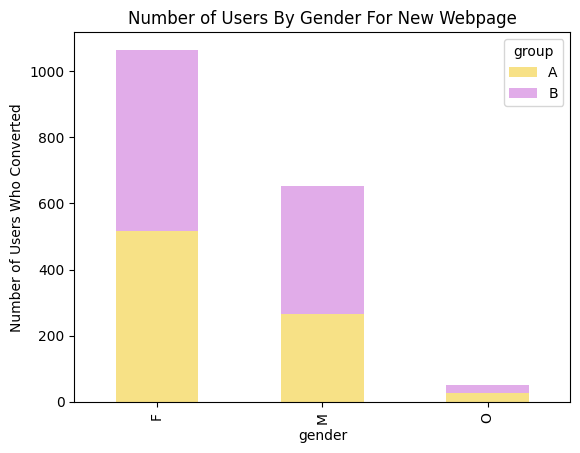

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by gender and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='gender', columns='group', values='id', aggfunc='nunique')

# Create the stacked bar chart with bright purple and yellow colors
ax = pivot_table.plot(kind='bar', stacked=True, alpha=0.5, color=['#f1c40f', '#c45ad4'])
ax.set_ylabel('Number of Users Who Converted')
ax.set_title('Number of Users By Gender For New Webpage')

# Show the chart
plt.show()


#New Webpage Conversion By Gender

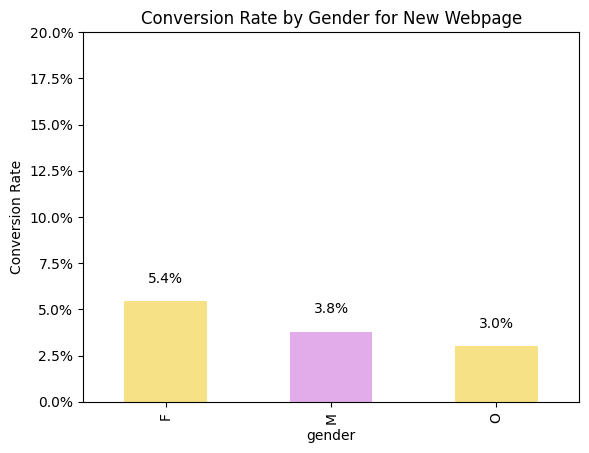

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by gender and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='gender', columns='group', values='id', aggfunc='nunique')

# Calculate the conversion rate by gender and group
conversion_rate = pivot_table / df_2.pivot_table(index='gender', columns='group', values='id', aggfunc='nunique')

# Create the stacked bar chart with bright purple and yellow colors
ax = conversion_rate.loc[:, 'B'].plot(kind='bar', color=['#f1c40f', '#c45ad4'], alpha=0.5)
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate by Gender for New Webpage')
ax.set_ylim([0, 0.2])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Add conversion rate values above the bars
for i, v in enumerate(conversion_rate.loc[:, 'B']):
    ax.text(i, v+0.01, "{:.1%}".format(v), ha='center')

# Show the chart
plt.show()




In [ ]:
import pandas as pd

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Filter for group B and users who converted
group_b_converted = df_2.loc[(df_2['group'] == 'B') & (df_2['sum'] > 0)]

# Calculate the conversion rate by gender
conversion_rate = group_b_converted.groupby('gender')['id'].nunique() / group_b_converted['id'].nunique()

# Calculate the conversion rate by gender and group
conversion_rate = pivot_table / df_2.pivot_table(index='gender', columns='group', values='id', aggfunc='nunique')

# Extract the conversion rate for group B by gender
conversion_rate_b = conversion_rate.loc[:, 'B']

# Format the conversion rate as a percentage with one decimal place
conversion_rate_b_formatted = (conversion_rate_b * 100).apply(lambda x: "{:.1f}%".format(x))

# Print the conversion rate for group B by gender
print("Conversion Rate By Gender For New Webpage (Group B):\n", conversion_rate_b_formatted)

Conversion Rate By Gender For New Webpage (Group B):
 gender
F    5.4%
M    3.8%
O    3.0%
Name: B, dtype: object


#Conversion Rate By Device

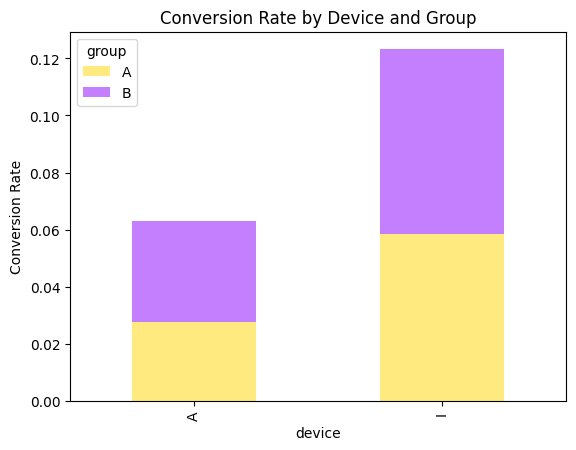

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by device and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='device', columns='group', values='id', aggfunc='nunique')

# Calculate the conversion rate by device and group
conversion_rate = pivot_table / df_2.pivot_table(index='device', columns='group', values='id', aggfunc='nunique')

# Define bright purple and bright yellow colors
colors = ['#FFD700', '#8B00FF']

# Create the stacked bar chart
ax = conversion_rate.plot(kind='bar', stacked=True, alpha=0.5, color=colors)
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate by Device and Group')

# Show the chart
plt.show()




#Conversion Rate For New Webpage By Country


In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('glo_box.csv')

# Calculate the conversion rate by country and group
grouped = df.groupby(['country', 'group']).agg({'id': 'count', 'sum': 'sum'}).reset_index()
grouped['Conversion_Rate'] = grouped['sum'] / grouped['id']

# Get the top 10 converting countries for Group B, in descending order
top_countries_b = grouped[grouped['group'] == 'B'].nlargest(10, 'Conversion_Rate').sort_values(by='Conversion_Rate', ascending=False)

# Add a new column with the country rank
top_countries_b['Rank'] = top_countries_b['Conversion_Rate'].rank(method='dense', ascending=False)

# Print the top converting countries in a table
print('Top 10 Converting Countries for New Webpage')
print(top_countries_b[['Rank', 'country', 'Conversion_Rate']].to_string(index=False))

# Create the choropleth map
fig = px.choropleth(top_countries_b, locations='country', color='Conversion_Rate', 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Top 10 Converting Countries for New Webpage')
fig.show()






Top 10 Converting Countries for New Webpage
 Rank country  Conversion_Rate
  1.0     GBR         4.498004
  2.0     CAN         4.198568
  3.0     USA         4.053452
  4.0     MEX         3.345506
  5.0     ESP         3.234237
  6.0     BRA         3.066117
  7.0     DEU         2.708085
  8.0     TUR         2.488957
  9.0     FRA         2.268101
 10.0     AUS         2.080625


In [ ]:
!pip install geopandas


#Conversion Rate Per Device For New Webpage Device


---



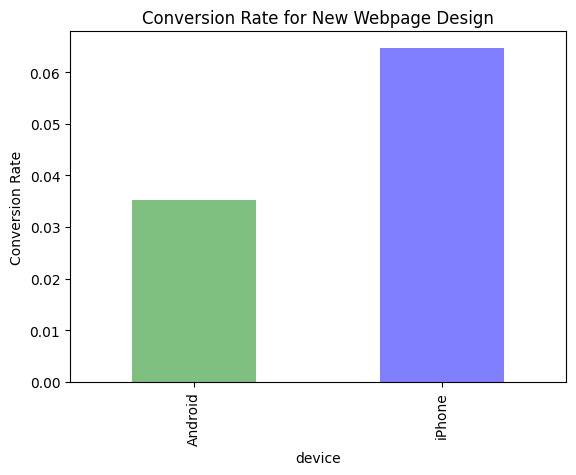

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by device and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='device', columns='group', values='id', aggfunc='nunique')

# Calculate the conversion rate by device and group
conversion_rate = pivot_table / df_2.pivot_table(index='device', columns='group', values='id', aggfunc='nunique')

# Create the stacked bar chart for group B
ax = conversion_rate.loc[:, 'B'].plot(kind='bar', color=['green', 'blue'], alpha=0.5)
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate for New Webpage Design')
ax.set_xticklabels(['Android', 'iPhone'], rotation=90)

# Remove extra white space at the bottom
plt.subplots_adjust(bottom=0.15)

# Show the chart
plt.show()












In [ ]:
import pandas as pd

# Load the data from your table into a pandas DataFrame
df_2 = pd.read_csv('glo_box.csv')

# Create a pivot table that shows the number of users who converted by device and group
pivot_table = pd.pivot_table(df_2.loc[df_2['sum'] > 0], index='device', columns='group', values='id', aggfunc='nunique')

# Calculate the conversion rate by device and group
conversion_rate = pivot_table / df_2.pivot_table(index='device', columns='group', values='id', aggfunc='nunique')

# Print the conversion rate for Android
print("Conversion rate for Android: {:.2%}".format(conversion_rate.loc['A', 'B']))

# Print the conversion rate for iPhone
print("Conversion rate for iPhone: {:.2%}".format(conversion_rate.loc['I', 'B']))


Conversion rate for Android: 3.52%
Conversion rate for iPhone: 6.47%
